# Exploratory Data Analysis

We will be examining all features available in `kaggle_steam` dataset (available in `data/01_raw/kaggle_steam.csv`) in this notebook.

This notebook aims to classify every feature into either `numerical` or `categorical` so that we can further analyse them based on more specialised techniques

**Setting up**

In [2]:
%load_ext kedro.ipython
%load_ext autoreload
%matplotlib inline
%autoreload 2

[04/17/23 15:01:22] INFO     Resolved project path as: /home/eckt/Documents/usg.                    ]8;id=849692;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=33943;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py#134\134]8;;\
                             To set a different path, run '%reload_kedro <project_root>'                           

[04/17/23 15:01:25] INFO     Kedro project usg                                                      ]8;id=178308;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=567777;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py#103\103]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=124818;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=583136;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py#104\104]8;;\
                             'pipelines'                                                                           

[04/17/23 15:01:26] INFO     Registered line magic 'run_viz'                                        ]8;id=408335;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=457512;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/ipython/__init__.py#110\110]8;;\

In [3]:
import pandas as pd
import polars as pl
import numpy as np

from matplotlib import rc_context
import matplotlib.pyplot as plt
import seaborn as sb
from seaborn.objects import Plot
import seaborn.objects as so

from sklearn.preprocessing import maxabs_scale

import logging

from usg.utils import *

log = logging.getLogger(__name__)
log.setLevel(logging.INFO)
sb.set()

**All features of `kaggle_steam` and their dtypes**

The dataset has **18** features: `appid`, `name`, `release_date`, `english`, `developer`, `publisher`, `platforms`, `required_age`, `categories`, `genres`, `steamspy_tags`, `achievements`, `positive_ratings`, `negative_ratings`, `average_playtime`, `median_playtime`, `owners`, `price`.

In [4]:
kaggle_steam: pd.DataFrame = catalog.load('kaggle_steam')
kaggle_steam.dtypes.to_frame().T

[04/17/23 15:01:27] INFO     Loading data from 'kaggle_steam' (CSVDataSet)...                   ]8;id=480214;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=955692;file:///home/eckt/.local/share/virtualenvs/usg-8_lb1q9f/lib/python3.8/site-packages/kedro/io/data_catalog.py#343\343]8;;\

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,int64,object,object,int64,object,object,object,int64,object,object,object,int64,int64,int64,int64,int64,object,float64


## [feature/1] `appid` - categorical

This variable is likely categorical because it is assigned.

## [feature/2] `name` - categorical

This variable is likely categorical because it is assigned.

## [feature/3] `release_date` - categorical

We define `release_date` to be categorical as there's no meaning in increasing dates

## [feature/4] `english` - categorical

This is a one-hot encoded column

In [6]:
kaggle_steam['english'].value_counts()

1    26564
0      511
Name: english, dtype: int64

## [feature/5] `developer` - categorical

This variable is categorical. It is the name of the developer of the game.

## [feature/6] `publisher` - categorical

This variable is categorical. It is the name of the publisher of the game.

## [feature/7] `platforms` - categorical

This variable is categorical. It is text. {windows,mac,linux}.

## [feature/8] `required_age` - categorical

This variable is categorical. There are only 6 unique values and it is discrete.

In [7]:
kaggle_steam['required_age'].value_counts()

0     26479
18      308
16      192
12       73
7        12
3        11
Name: required_age, dtype: int64

## [feature/9] `categories` - categorical

This variable is categorical. It is text. {Single-player, Multi-player...}

## [feature/10] `genres` - categorical

This variable is categorical. It is text. {Indie,Action,Casual}.

## [feature/11] `steamspy_tags` - categorical

This variable is categorical. It is text. {Indie,Action,Casual}.

## [feature/12] `achievements` - numerical

Continuous with extreme outliers.

In [14]:
kaggle_steam['achievements'].describe()

count    27075.000000
mean        45.248864
std        352.670281
min          0.000000
25%          0.000000
50%          7.000000
75%         23.000000
max       9821.000000
Name: achievements, dtype: float64

[None]

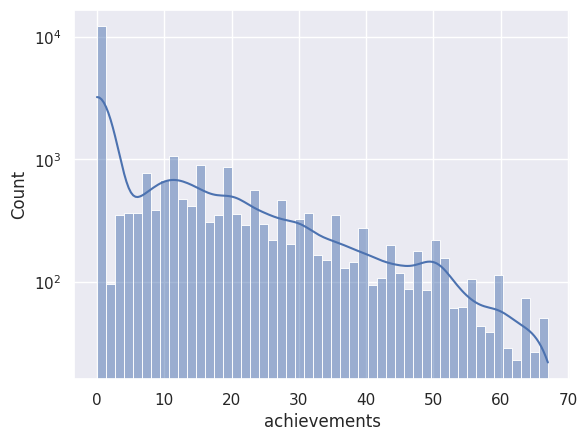

In [37]:
sb.histplot(kaggle_steam.loc[kaggle_steam['achievements'] <= kaggle_steam['achievements'].quantile(0.95)]['achievements'], kde=True).set(yscale='log')

## [feature/13] `positive_ratings` - numerical

Continuous with extreme outliers.

[None]

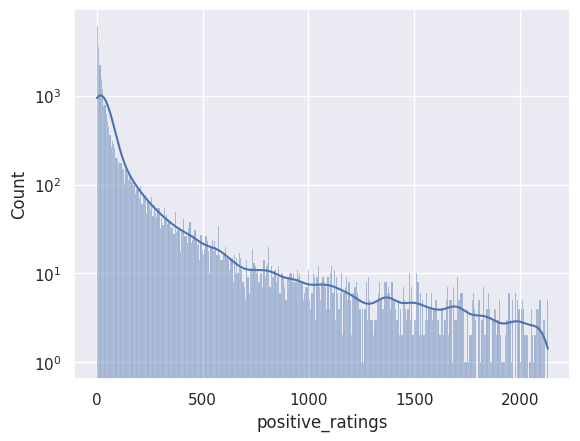

In [36]:
sb.histplot(kaggle_steam.loc[kaggle_steam['positive_ratings'] <= kaggle_steam['positive_ratings'].quantile(0.95)]['positive_ratings'], kde=True).set(yscale='log')

## [feature/14] `negative_ratings` - numerical

Continuous with extreme outliers.

[None]

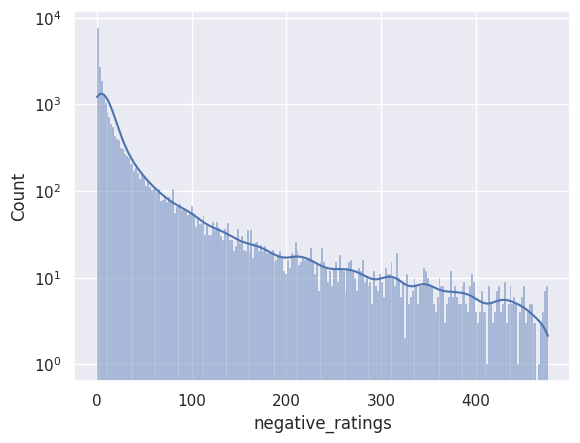

In [35]:
sb.histplot(kaggle_steam.loc[kaggle_steam['negative_ratings'] <= kaggle_steam['negative_ratings'].quantile(0.95)]['negative_ratings'], kde=True).set(yscale='log')

## [feature/15] `average_playtime` - numerical

Continuous with extreme outliers.

[None]

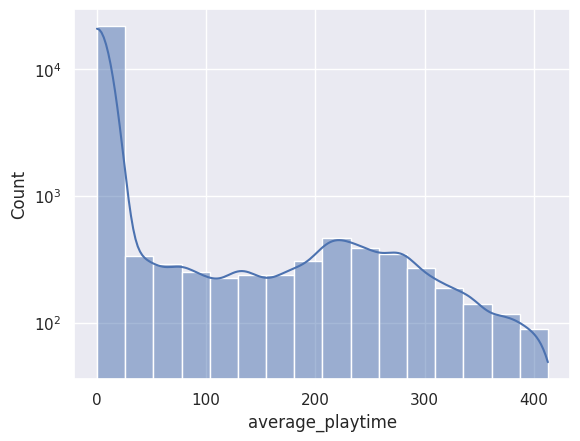

In [34]:
sb.histplot(kaggle_steam.loc[kaggle_steam['average_playtime'] <= kaggle_steam['average_playtime'].quantile(0.95)]['average_playtime'], kde=True).set(yscale='log')

## [feature/16] `median_playtime` - numerical

Continuous with extreme outliers.

[None]

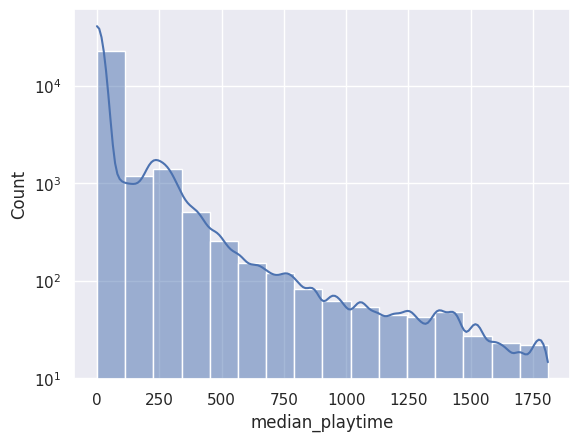

In [33]:
sb.histplot(kaggle_steam.loc[kaggle_steam['median_playtime'] <= kaggle_steam['median_playtime'].quantile(0.99)]['median_playtime'], kde=True).set(yscale='log')

## [feature/17] `owners` - categorical

Categorical - consists of bands

In [38]:
kaggle_steam['owners'].value_counts()

0-20000                18596
20000-50000             3059
50000-100000            1695
100000-200000           1386
200000-500000           1272
500000-1000000           513
1000000-2000000          288
2000000-5000000          193
5000000-10000000          46
10000000-20000000         21
20000000-50000000          3
50000000-100000000         2
100000000-200000000        1
Name: owners, dtype: int64

## [feature/18] `price` - numerical

Continuous with extreme outliers.

[None]

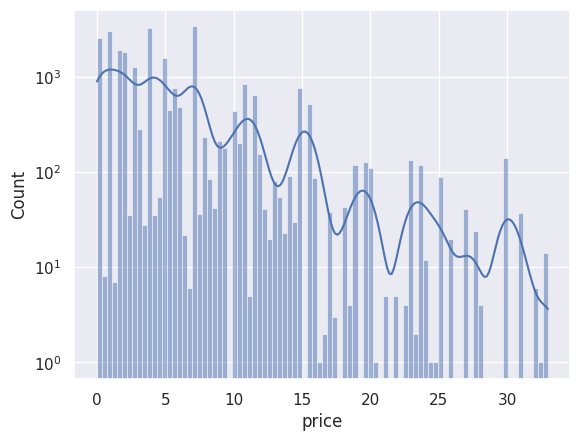

In [40]:
sb.histplot(kaggle_steam.loc[kaggle_steam['price'] <= kaggle_steam['price'].quantile(0.99)]['price'], kde=True).set(yscale='log')

# Summary

In this notebook, we did a cursory examination of each feature and determined which type of variable they belonged to.

**categorical**
- appid
- name
- release_date
- english
- developer
- publisher
- platforms
- required_age
- categories
- genres
- steamspy_tags
- owners

**numerical**
- achievements
- positive_ratings
- negative_ratings
- average_playtime
- median_playtime
- price